In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Audio Enginnering/features_30_sec.csv')

In [ ]:
features = ['chroma_stft_mean','chroma_stft_var','rms_mean','rms_var','spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean',
           'spectral_bandwidth_var','rolloff_mean','rolloff_var','zero_crossing_rate_mean','zero_crossing_rate_var','harmony_mean','harmony_var'
           ,'perceptr_mean','perceptr_var','tempo','mfcc1_mean','mfcc1_var','mfcc2_mean','mfcc2_var','mfcc3_mean','mfcc3_var','mfcc4_mean',
           'mfcc4_var','mfcc5_mean','mfcc5_var','mfcc6_mean','mfcc6_var','mfcc7_mean','mfcc7_var','mfcc8_mean','mfcc8_var','mfcc9_mean',
           'mfcc9_var','mfcc10_mean','mfcc10_var','mfcc11_mean','mfcc11_var','mfcc12_mean','mfcc12_var','mfcc13_mean','mfcc13_var','mfcc14_mean',
           'mfcc14_var','mfcc15_mean','mfcc15_var','mfcc16_mean','mfcc16_var','mfcc17_mean','mfcc17_var','mfcc18_mean','mfcc18_var','mfcc19_mean',
           'mfcc19_var','mfcc20_mean','mfcc20_var']

gernes = ['classical', 'pop', 'reggae']
num_gernes = len(gernes)
num_features = len(features)
print('num_features:',num_features)
print('num_gernes:',num_gernes)

num_features: 57
num_gernes: 3


In [ ]:
means = []
variances = []
for gerne in gernes:
  class_a_data = df[df['label'] == gerne]
  print(gerne)
  for feature in features:
    # Calculate mean and variance
    mean_feature = class_a_data[feature].mean()
    variance_feature = class_a_data[feature].var()

    means.append(mean_feature)
    variances.append(variance_feature)

classical
pop
reggae


In [ ]:
means = np.array(means).reshape(3,-1)
variances = np.array(variances).reshape(3,-1)

In [ ]:
means[:,2]

array([0.04291991, 0.1997339 , 0.12250284])

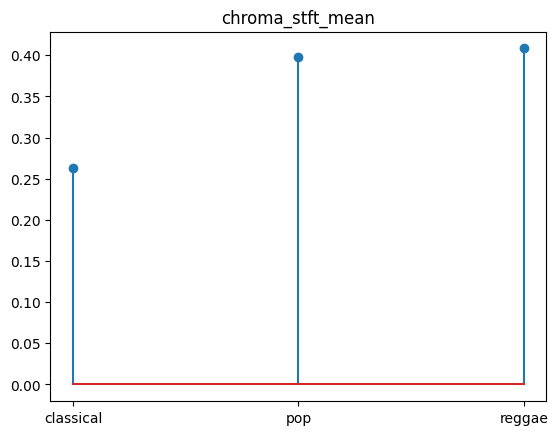

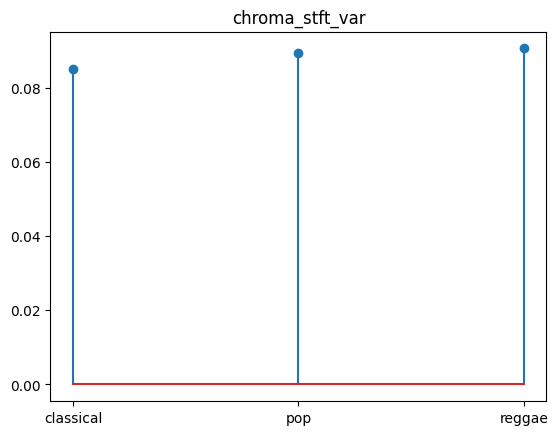

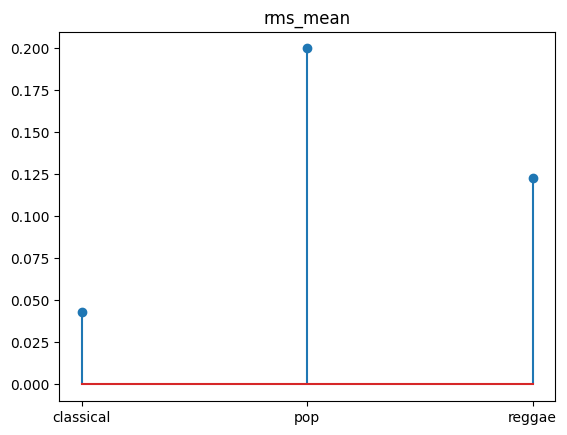

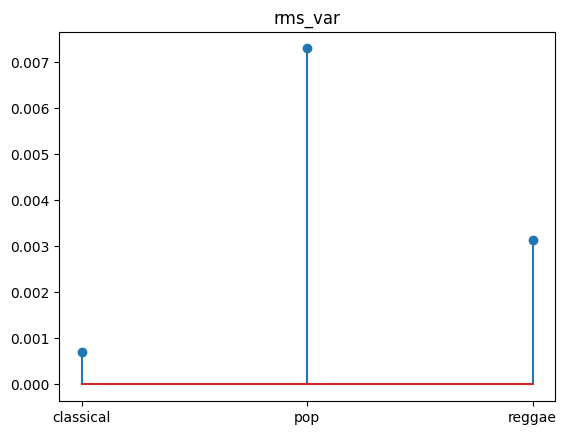

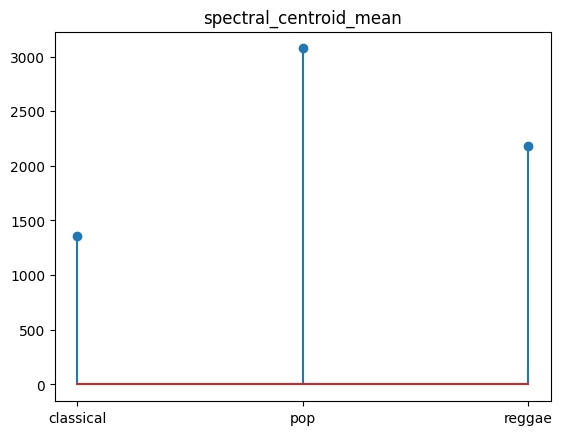

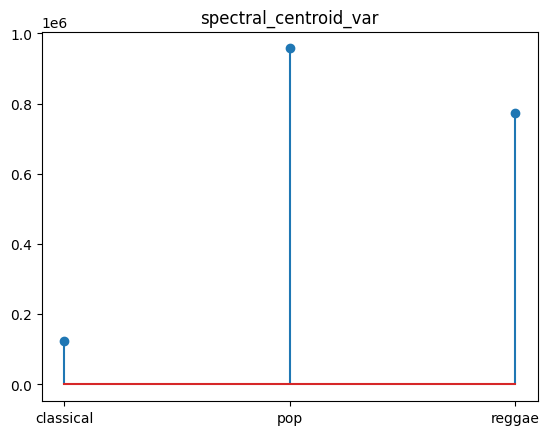

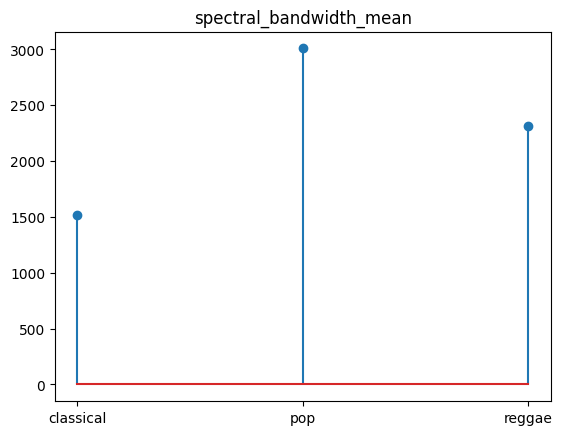

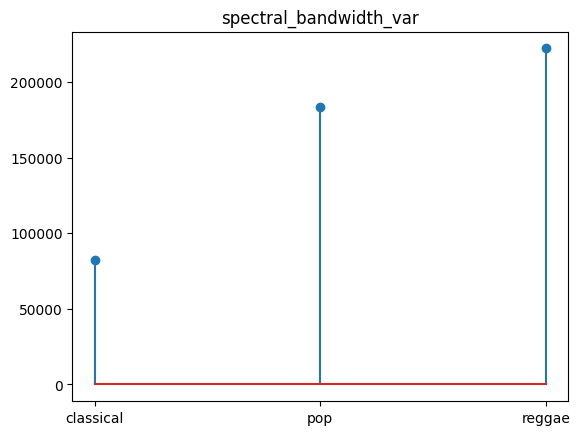

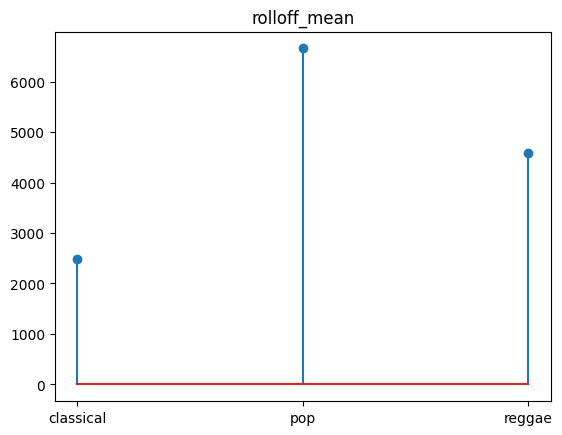

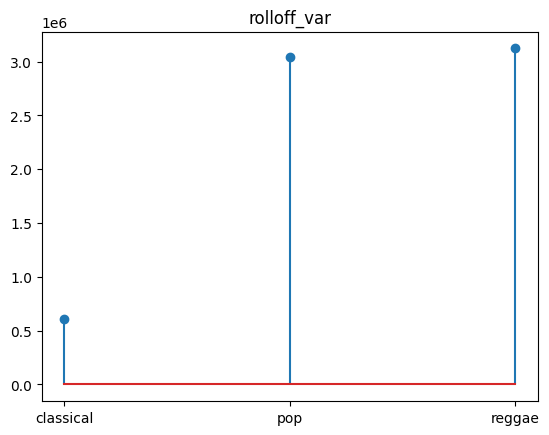

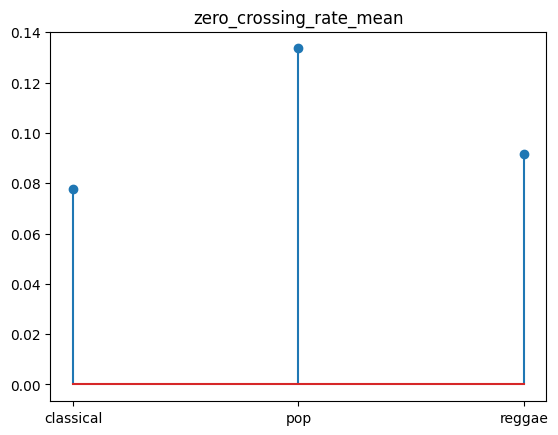

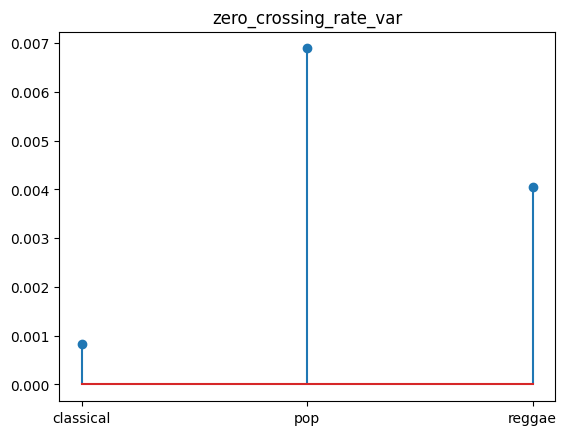

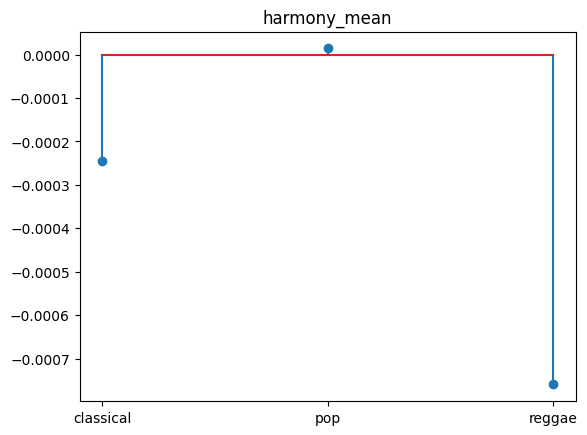

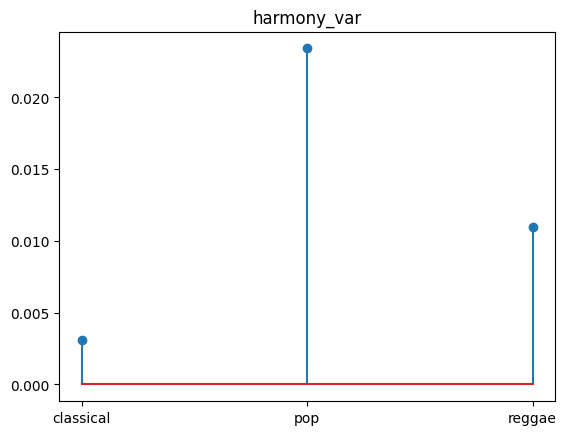

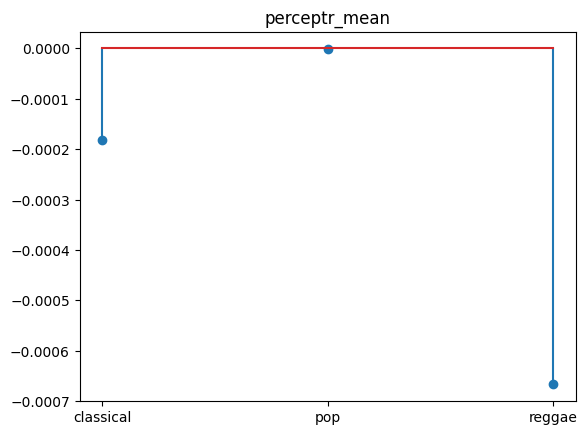

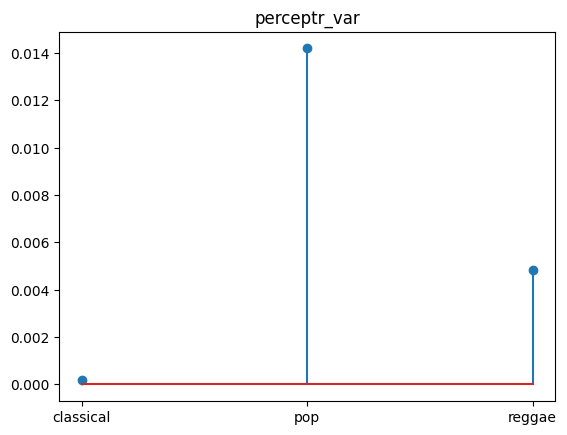

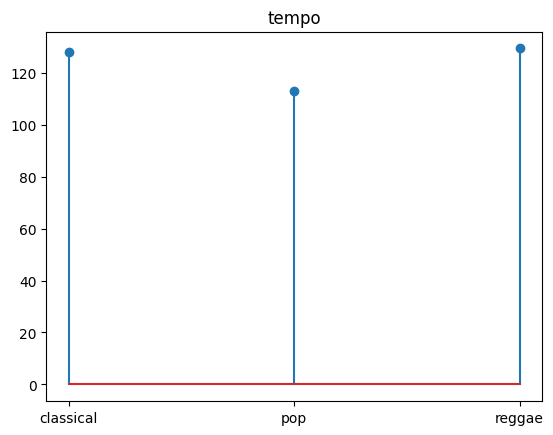

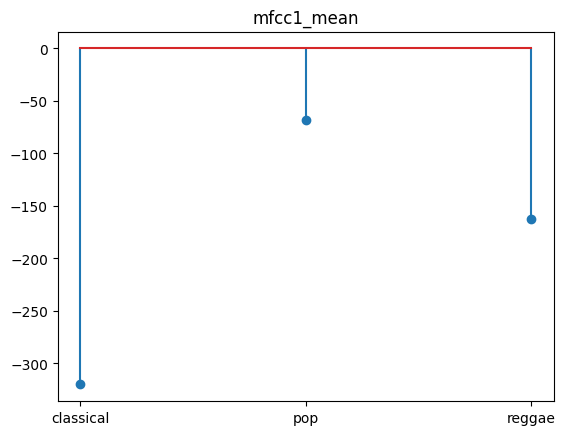

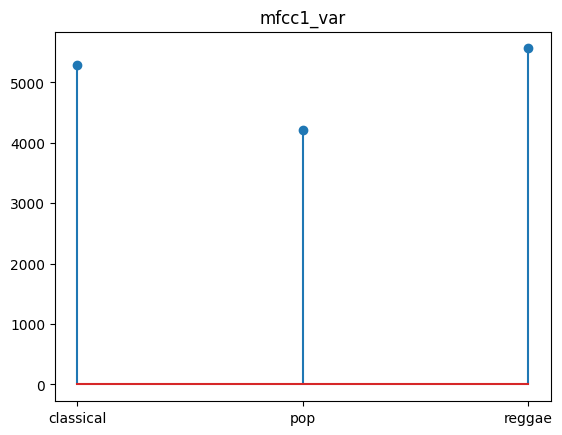

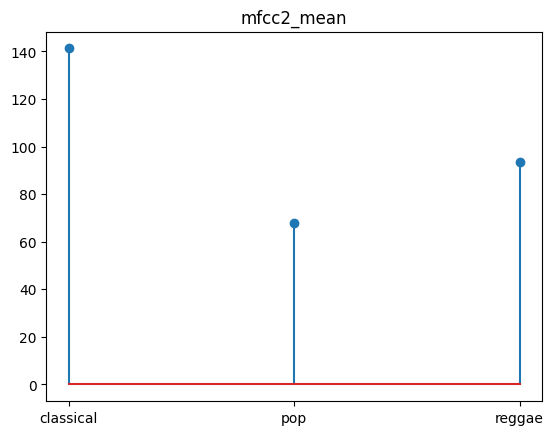

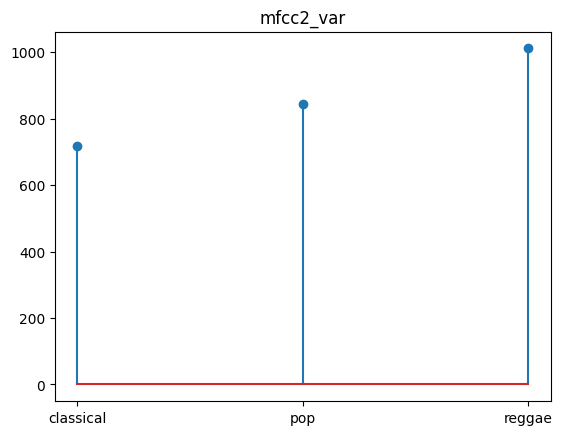

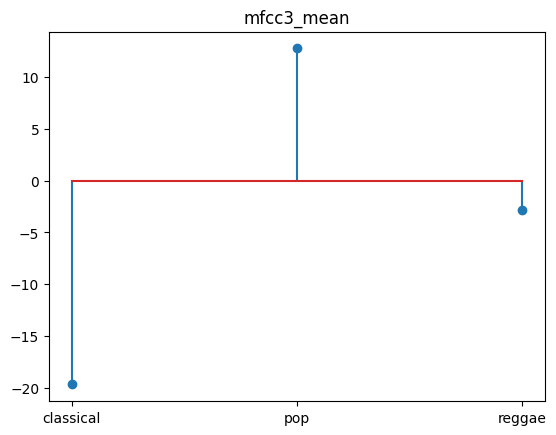

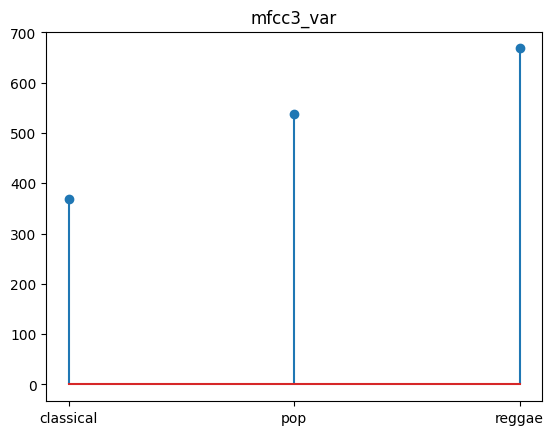

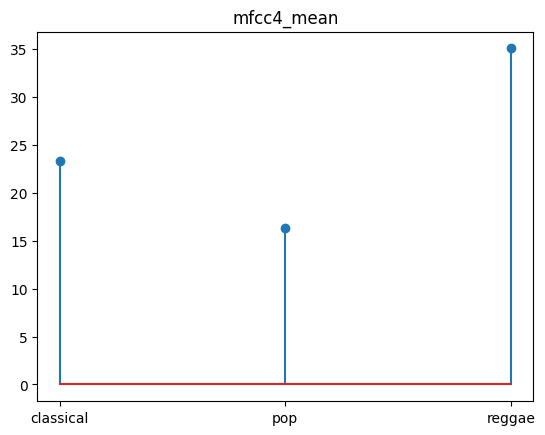

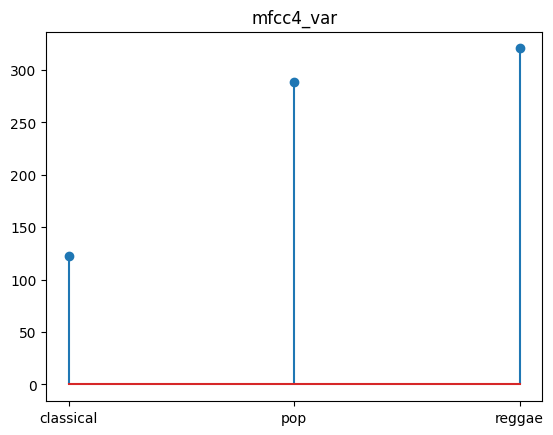

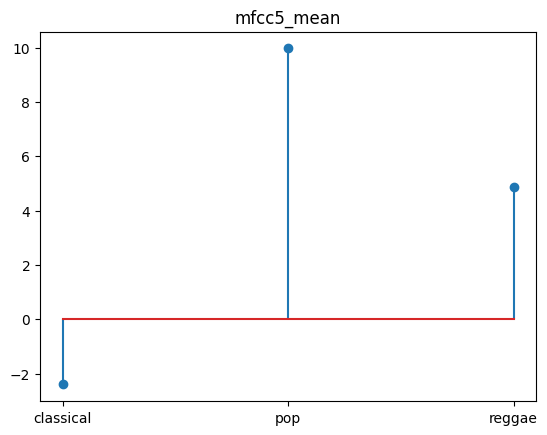

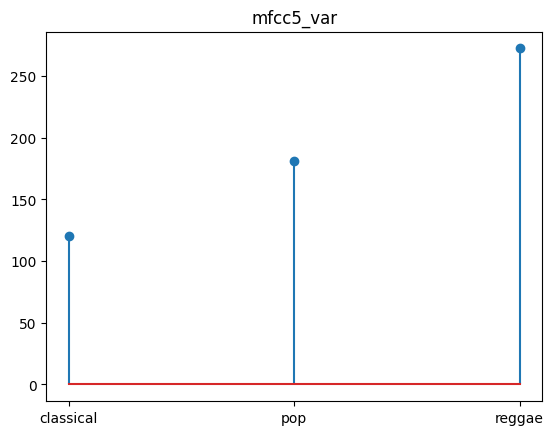

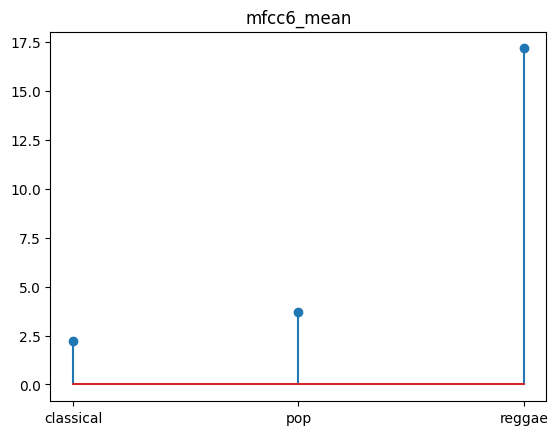

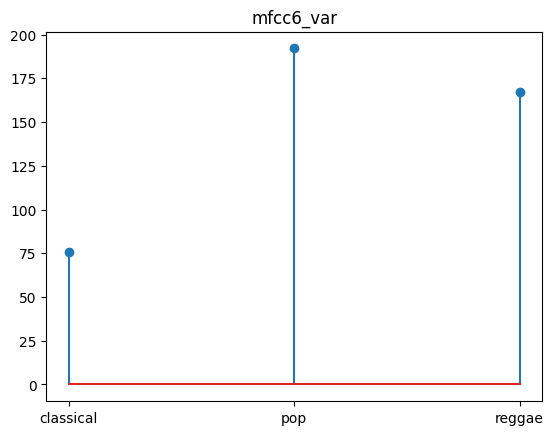

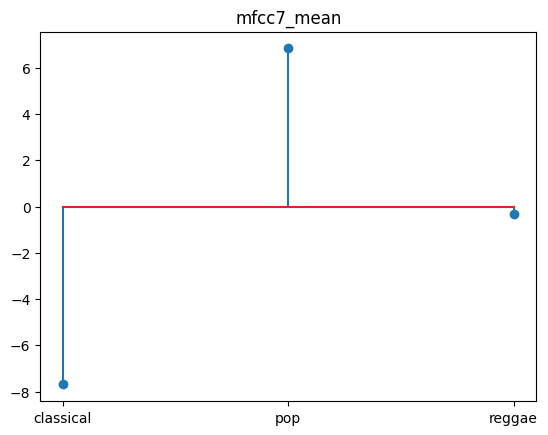

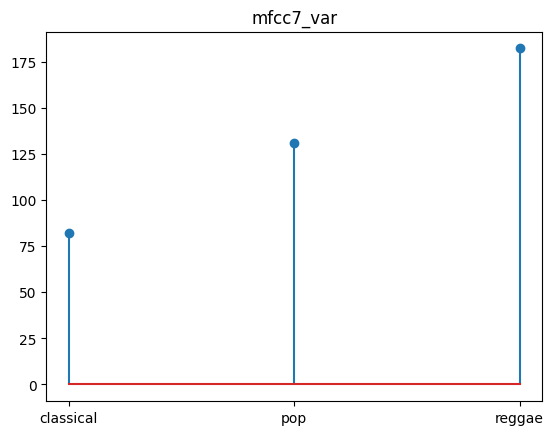

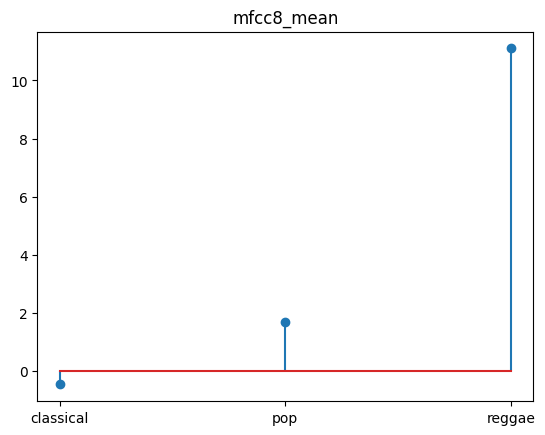

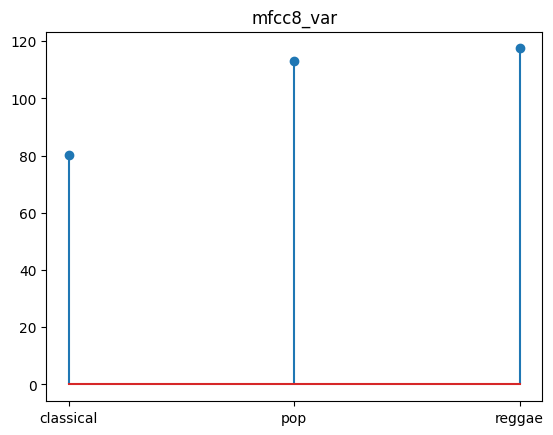

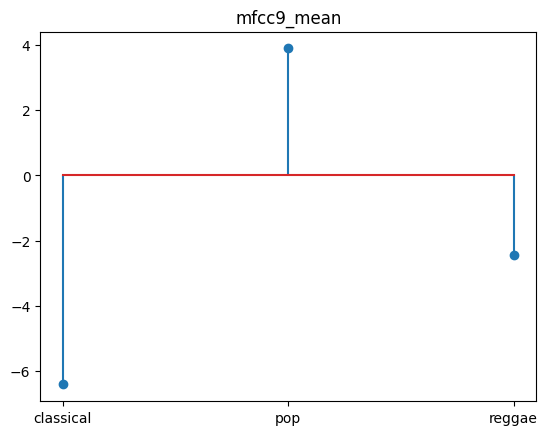

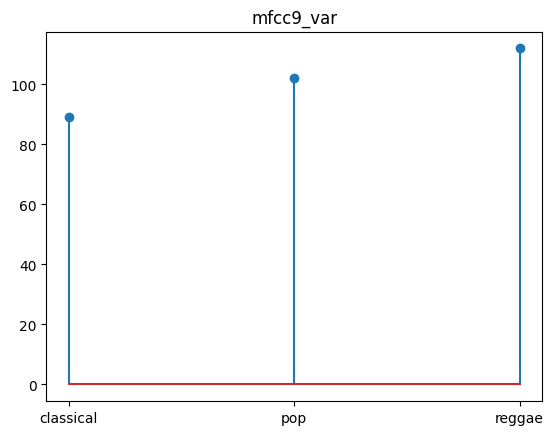

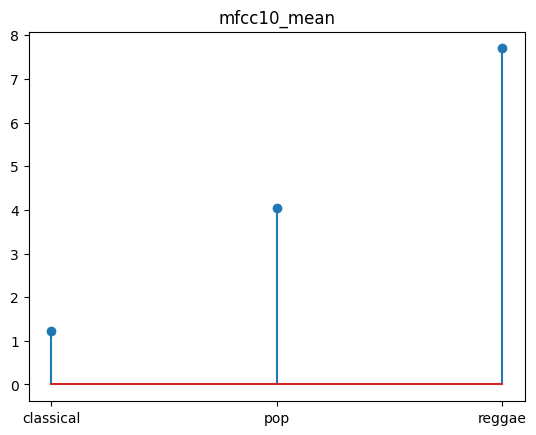

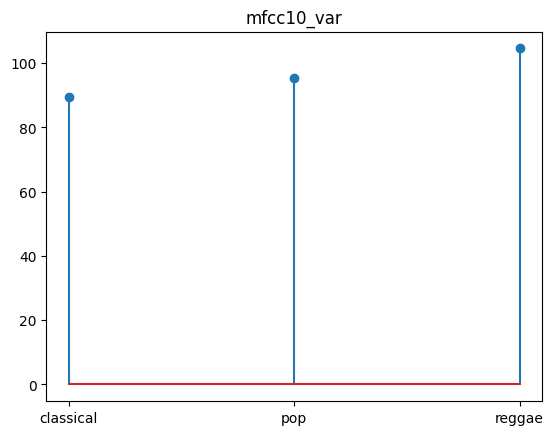

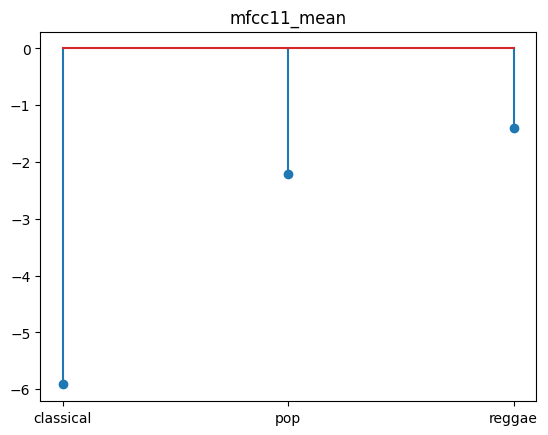

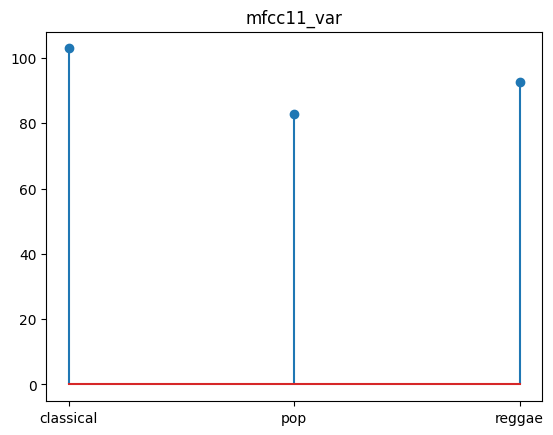

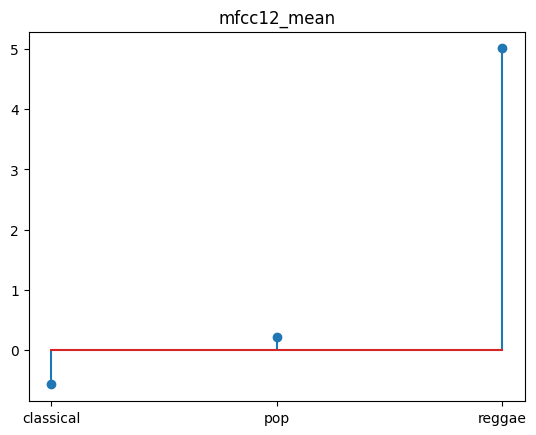

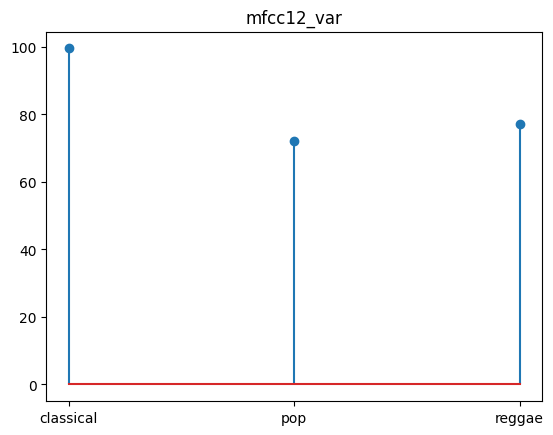

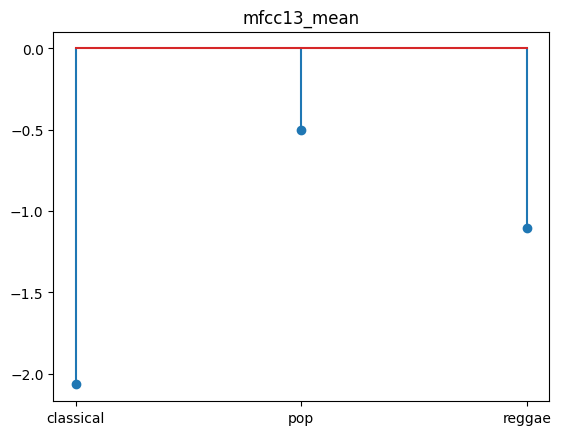

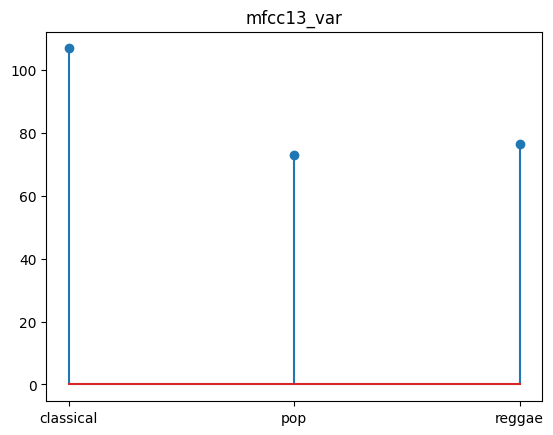

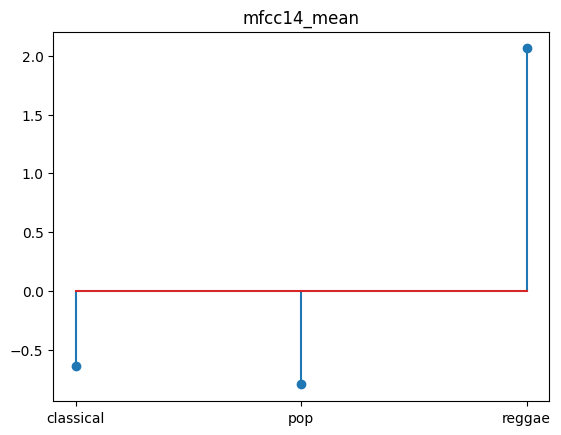

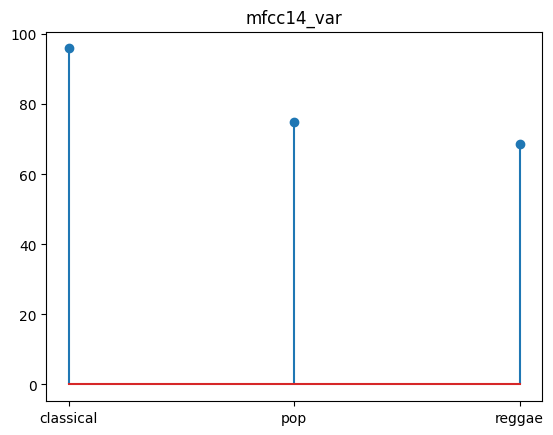

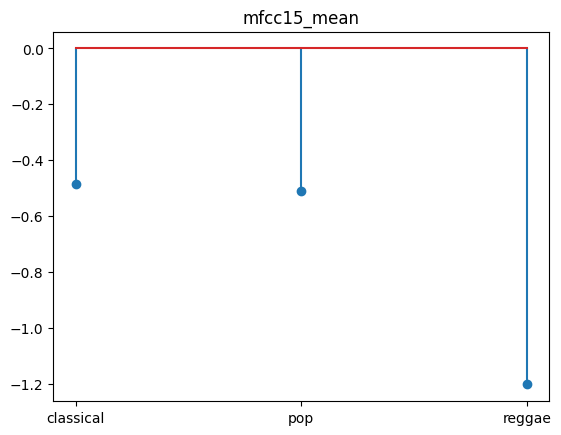

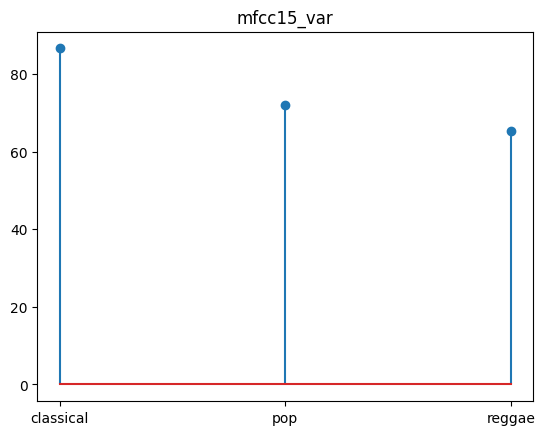

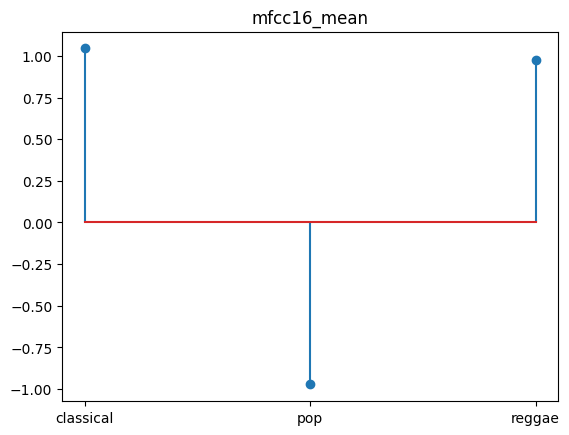

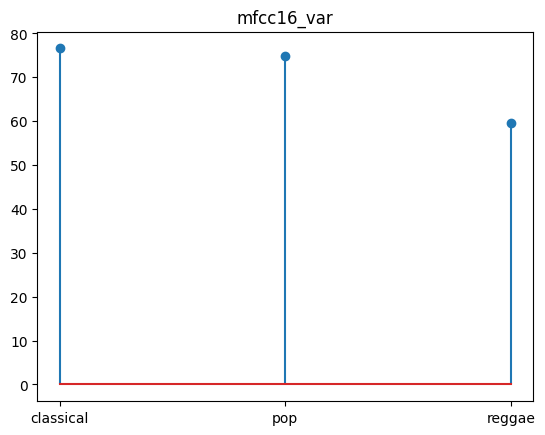

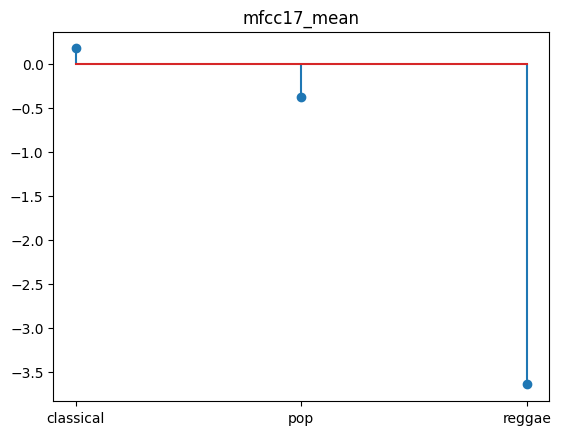

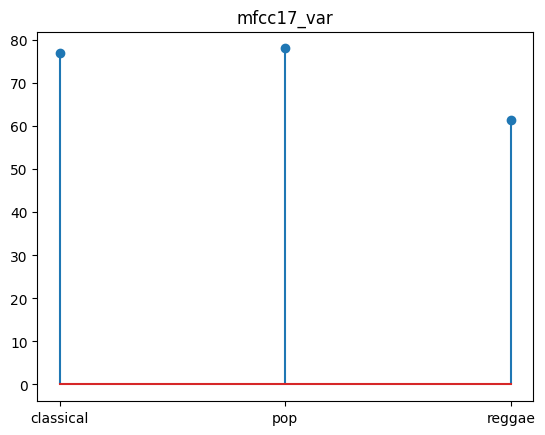

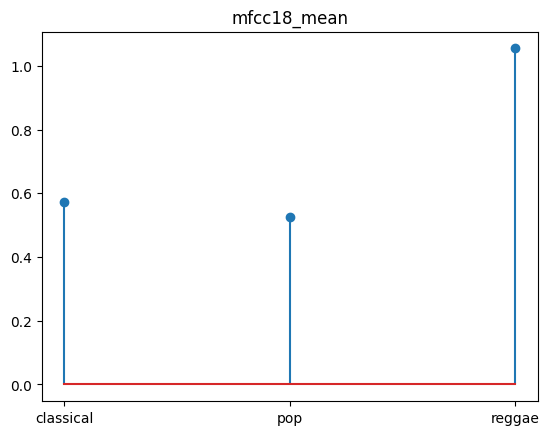

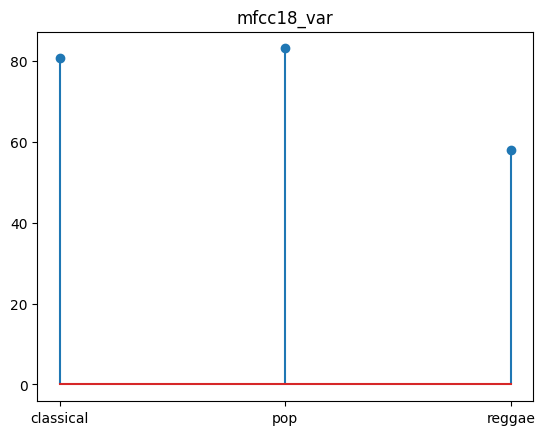

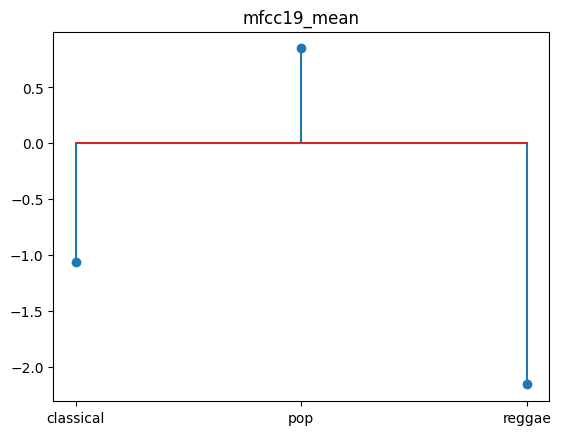

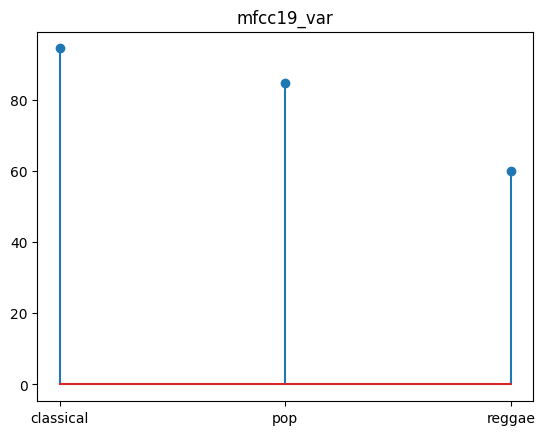

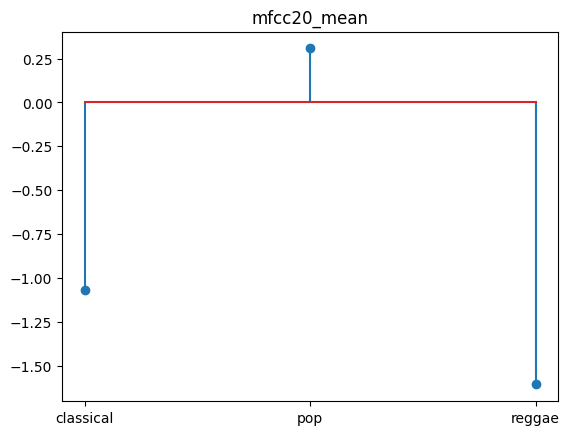

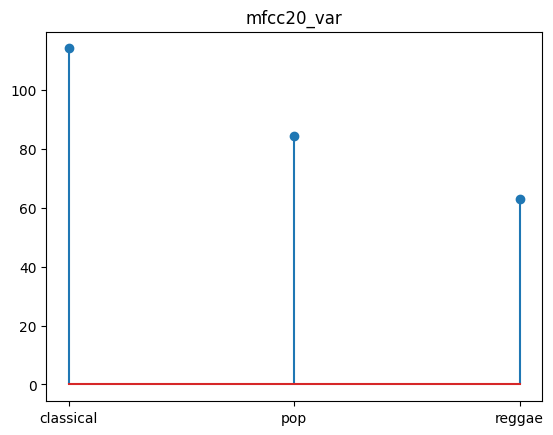

In [ ]:
for k in range(57):
  plt.title(features[k])
  plt.stem(means[:,k])
  plt.xticks(range(len(gernes)), gernes)
  plt.show()

In [ ]:
selected_features = ['harmony_mean', 'rms_mean', 'rms_var']
#selected_features = ['spectral_centroid_var', 'spectral_bandwidth_var','rms_var']
indices = [features.index(feature) for feature in selected_features]
selected_variances = variances[:, indices]

In [ ]:
selected_variances

array([[3.69857116e-07, 1.35644956e-03, 7.24572194e-07],
       [1.58022516e-06, 3.36445693e-03, 2.34928716e-05],
       [1.94837196e-06, 2.56676138e-03, 7.68606007e-06]])

In [ ]:
data = df[df['label'].isin(gernes)]
cols = ['harmony_mean', 'rms_mean', 'rms_var', 'label']
data = data[cols]
print(data.head())

     harmony_mean  rms_mean   rms_var      label
100     -0.000047  0.036245  0.000221  classical
101     -0.000051  0.030625  0.000161  classical
102     -0.000020  0.043860  0.000193  classical
103     -0.000035  0.029442  0.000357  classical
104     -0.000059  0.042316  0.000209  classical


In [ ]:
# Extract the features from the DataFrame
features = data[selected_features]

# Specify the number of clusters (you may need to choose an appropriate value)
num_clusters = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=50)

# Fit the model to your data
kmeans.fit(features)

# Add the cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

# Display the resulting DataFrame
print(data)

     harmony_mean  rms_mean   rms_var      label  Cluster
100 -4.660241e-05  0.036245  0.000221  classical        0
101 -5.125009e-05  0.030625  0.000161  classical        0
102 -1.969643e-05  0.043860  0.000193  classical        0
103 -3.537292e-05  0.029442  0.000357  classical        0
104 -5.909681e-05  0.042316  0.000209  classical        0
..            ...       ...       ...        ...      ...
895 -6.684379e-06  0.162340  0.004120     reggae        2
896 -1.646600e-03  0.162230  0.005087     reggae        2
897 -5.099177e-03  0.110746  0.002601     reggae        2
898  4.206447e-05  0.139203  0.002202     reggae        2
899 -5.529612e-07  0.180177  0.001482     reggae        1

[300 rows x 5 columns]


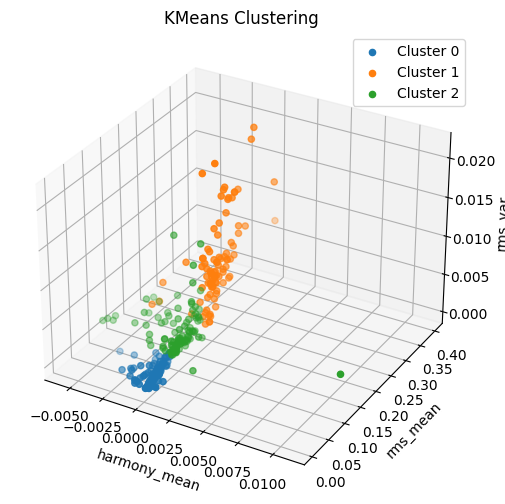

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_label in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_label]
    ax.scatter(cluster_data[selected_features[0]], cluster_data[selected_features[1]], cluster_data[selected_features[2]], label=f'Cluster {cluster_label}')

ax.set_xlabel(selected_features[0])
ax.set_ylabel(selected_features[1])
ax.set_zlabel(selected_features[2])
ax.set_title('KMeans Clustering')

plt.legend()
plt.show()

In [ ]:
data.to_csv('output.csv', index=False)

In [ ]:
pop_data = data[data['label'] == 'pop']
pop_clusters = pop_data['Cluster'].values

rock_data = data[data['label'] == 'classical']
rock_clusters = rock_data['Cluster'].values

reggae_data = data[data['label'] == 'reggae']
reggae_clusters = reggae_data['Cluster'].values

In [ ]:
counts = np.bincount(pop_clusters)
pop_value = np.argmax(counts)
print(counts)

counts = np.bincount(rock_clusters)
rock_value = np.argmax(counts)
print(counts)

counts = np.bincount(reggae_clusters)
print(counts)
reggae_value = np.argmax(counts)

print(pop_value,rock_value,reggae_value)

[ 2 74 24]
[88  2 10]
[14 16 70]
1 0 2


In [ ]:
predicted = np.concatenate((pop_clusters,rock_clusters,reggae_clusters))
true = np.concatenate((np.full(len(pop_clusters), 1), np.full(len(rock_clusters), 0), np.full(len(reggae_clusters), 2)))

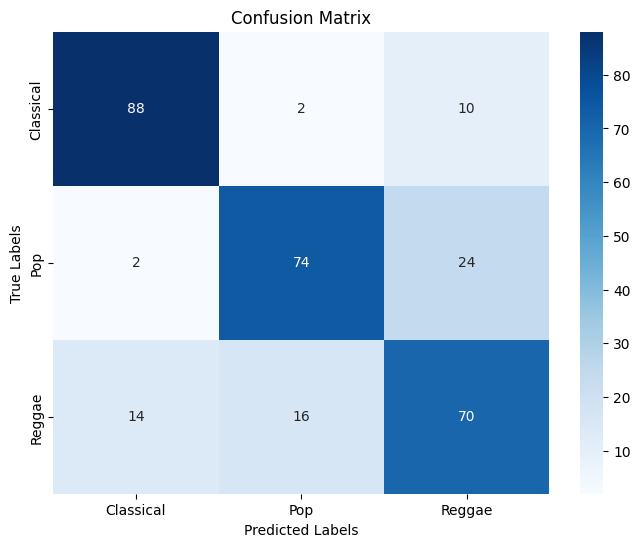

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Number of classes
num_classes = 3

# Create a confusion matrix
conf_matrix = confusion_matrix(true, predicted)

# Set class labels
class_labels = ['Classical' ,'Pop', 'Reggae',]

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()